In [1]:
def notebook_startup():
    import os
    import sys
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Display settings
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 100)

    # Plotting style
    sns.set(style='whitegrid')

    print("✅ Notebook environment is ready!")
    print(f"Working directory: {os.getcwd()}")
    print(f"Python version: {sys.version.split()[0]}")
    print("Common libraries imported: pandas, numpy, matplotlib, seaborn")

# Call the function
notebook_startup()


✅ Notebook environment is ready!
Working directory: d:\sql_python_mastery\python_projects_analyses\01_Apple_Store_Analysis
Python version: 3.11.13
Common libraries imported: pandas, numpy, matplotlib, seaborn


# 📘 AppleStore_EDA.ipynb



## 📌 Step 1: Import Required Libraries


In [2]:
#%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:

# Optional settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")



### 📌 Step 2: Load Cleaned CSV


In [27]:
import pandas as pd

# Try reading with ISO-8859-1 encoding (a.k.a. Latin-1)
df = pd.read_csv(r"D:\sql_python_mastery\python_projects_analyses\01_Apple_Store_Analysis\01_final_store_data_normalized.csv", encoding='ISO-8859-1')

# Check
print(df.head())


   sale_id  store_id  product_id  quantity  claim_id claim_date  \
0      201         1         101         5       NaN        NaN   
1      202         2         102         2       NaN        NaN   
2      203         3         103         1       NaN        NaN   
3      204         4         104         3       NaN        NaN   
4      206         5         105         4     303.0        NaN   

   repair_status          product_name  category_id launch_date  price  \
0            NaN        iPhone 13 Mini            1  2021-09-14    699   
1            NaN    MacBook Pro M1 13"            2  2021-10-18   1299   
2            NaN           iPad Mini 6            3  2021-09-24    499   
3            NaN  Apple Watch Series 7            4  2021-10-15    399   
4  Paid Repaired         iPhone 14 Pro            1  2022-09-16    999   

  category_name            store_name       city    country  revenue  \
0   Smartphones     Apple Store Saket  New Delhi      India     3495   
1       


#### 📌 Step 3: Revenue Column (if not already saved)


In [5]:
if 'revenue' not in df.columns:
    df['revenue'] = df['quantity'] * df['price']



#### 📌 Step 4: Total Revenue by Category


In [6]:
total_revenue_by_category = (
    df.groupby('category_name')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
)
print("\n💰 Total Revenue by Product Category:")
print(total_revenue_by_category)



💰 Total Revenue by Product Category:
  category_name  revenue
2       Laptops   257237
3   Smartphones   135427
4       Tablets   122974
0   Accessories    90720
1         Audio    10077
5     Wearables     7733



#### 📌 Step 5: Store with Highest Number of Sales


In [7]:
store_sales = df.groupby('store_name')['quantity'].sum().reset_index()
store_sales = store_sales.sort_values(by='quantity', ascending=False)
top_store = store_sales.iloc[0]
print("\n🏬 Highest Sales Store:")
print(f"{top_store['store_name']} → {top_store['quantity']} units sold")



🏬 Highest Sales Store:
Apple Store San Antonio → 7 units sold



#### 📌 Step 6: Average Sale Value per Store


In [8]:
avg_sales = df.groupby('store_name')['revenue'].mean().reset_index()
avg_sales = avg_sales.sort_values(by='revenue', ascending=False)
print("\n📊 Average Sale Value per Store:")
print(avg_sales.head())



📊 Average Sale Value per Store:
                  store_name  revenue
126  Apple Store Los Angeles  29995.0
73      Apple Store Fairview  17997.0
54     Apple Store Cleveland  13794.0
26        Apple Store Beirut   8094.0
143        Apple Store Miami   7794.0



#### 📌 Step 7: Top 5 Products by Quantity Sold


In [9]:
top_products = (
    df.groupby('product_name')['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
)
print("\n📦 Top 5 Best-Selling Products:")
print(top_products.head(10))



📦 Top 5 Best-Selling Products:
           product_name  quantity
110      iPhone 13 Mini        21
36          Mac Mini M2        18
70        iPad 10th Gen        14
82          iPad Aurora        14
6         AirPods Pro 2        14
114       iPhone 14 Pro        13
126          iPhone Air        12
21    Apple Watch Herms        12
0             AirPods 3        12
31   Apple Watch Summit        11


### 📊 Sales Analysis

In [10]:
#1. What is the total revenue generated across all stores?
total_revenue = df['revenue'].sum()
print(f"\n💵 Total Revenue Generated: ${total_revenue:,.2f}")



💵 Total Revenue Generated: $624,168.00


In [11]:
#2. Which product generated the highest revenue?
highest_revenue_product = df.groupby('product_name')['revenue'].sum().idxmax()
highest_revenue = df.groupby('product_name')['revenue'].sum().max() 
print(f"\n💰 Product with Highest Revenue: {highest_revenue_product} (${highest_revenue:,.2f})")



💰 Product with Highest Revenue: Mac Pro (2019) ($53,991.00)


In [12]:
#3. What is the total revenue by product category?
total_revenue_by_category = df.groupby('category_name')['revenue'].sum().reset_index()
total_revenue_by_category = total_revenue_by_category.sort_values(by='revenue', ascending=False)
print("\n📊 Total Revenue by Product Category:")
print(total_revenue_by_category.head()) 



📊 Total Revenue by Product Category:
  category_name  revenue
2       Laptops   257237
3   Smartphones   135427
4       Tablets   122974
0   Accessories    90720
1         Audio    10077


In [13]:
#4. Which store has the highest number of sales?
store_sales = df.groupby('store_name')['quantity'].sum().reset_index()
store_sales = store_sales.sort_values(by='quantity', ascending=False)
top_store = store_sales.iloc[0]
print("\n🏬 Highest Sales Store:")
print(f"{top_store['store_name']} → {top_store['quantity']} units sold")



🏬 Highest Sales Store:
Apple Store San Antonio → 7 units sold


In [14]:
# 5. Which city has the highest total revenue?
city_revenue = df.groupby('city')['revenue'].sum().reset_index()
city_revenue = city_revenue.sort_values(by='revenue', ascending=False)
print("\n🌆 City with Highest Total Revenue:")
print(f"{city_revenue.iloc[0]['city']} → ${city_revenue.iloc[0]['revenue']:,.2f}")



🌆 City with Highest Total Revenue:
Los Angeles → $29,995.00


In [15]:
# 6. What is the average sale value per store?
avg_sales = df.groupby('store_name')['revenue'].mean().reset_index()
avg_sales = avg_sales.sort_values(by='revenue', ascending=False)
print("\n📊 Average Sale Value per Store:")
print(avg_sales.head())



📊 Average Sale Value per Store:
                  store_name  revenue
126  Apple Store Los Angeles  29995.0
73      Apple Store Fairview  17997.0
54     Apple Store Cleveland  13794.0
26        Apple Store Beirut   8094.0
143        Apple Store Miami   7794.0


### 📦 Product Performance

In [16]:
#1. What are the top 5 best-selling products by quantity?
top_products_by_quantity = (
    df.groupby('product_name')['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
)
print("\n📦 Top 5 Best-Selling Products by Quantity:")
print(top_products_by_quantity.head())



📦 Top 5 Best-Selling Products by Quantity:
       product_name  quantity
110  iPhone 13 Mini        21
36      Mac Mini M2        18
70    iPad 10th Gen        14
82      iPad Aurora        14
6     AirPods Pro 2        14


In [17]:
# 2. What are the top 5 most returned/repaired products (from warranty/claim data)?
top_returned_products = (
    df[df['claim_id'].notnull()]
    .groupby('product_name')['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
)
print("\n🔧 Top 5 Most Returned/Repair Products:")
print(top_returned_products.head())



🔧 Top 5 Most Returned/Repair Products:
                 product_name  quantity
58             iPhone 13 Mini        13
10          Apple Watch Herms         9
45               iPad Explore         8
60              iPhone 14 Pro         8
15  Apple Watch Titan Edition         7


In [18]:
# 3. What is the average price of products by category?
avg_price_by_category = (
    df.groupby('category_name')['price']
    .mean()
    .reset_index()
    .round(2)
    .sort_values(by='price', ascending=False)
)
print("\n💲 Average Price of Products by Category:")
print(avg_price_by_category.head())



💲 Average Price of Products by Category:
  category_name    price
2       Laptops  1622.21
3   Smartphones   882.57
4       Tablets   639.91
0   Accessories   584.56
5     Wearables   442.75


In [19]:
# 4. Which product category has the most diverse price range?
price_range_by_category = (
    df.groupby('category_name')['price']
    .agg(['min', 'max'])
    .reset_index()
)
print("\n📊 Price Range by Product Category:")
print(price_range_by_category.head())



📊 Price Range by Product Category:
  category_name  min   max
0   Accessories   59  1349
1         Audio  179   549
2       Laptops  699  5999
3   Smartphones  429  1499
4       Tablets  329  1299


### 🏬 Store Insights

In [20]:
# 1. What is the number of stores per country?
stores_per_country = df['country'].value_counts().reset_index()
stores_per_country.columns = ['country', 'number_of_stores']
print("\n🌍 Number of Stores per Country:")
print(stores_per_country.head())



🌍 Number of Stores per Country:
          country  number_of_stores
0   United States               104
1           Japan                13
2          France                10
3  United Kingdom                 7
4           India                 7


In [21]:
# 2. Which country generates the most revenue?
country_revenue = df.groupby('country')['revenue'].sum().reset_index()
country_revenue = country_revenue.sort_values(by='revenue', ascending=False)
print("\n🌍 Country with Highest Revenue:")
print(f"{country_revenue.iloc[0]['country']} → ${country_revenue.iloc[0]['revenue']:,.2f}")



🌍 Country with Highest Revenue:
United States → $310,774.00


In [22]:
df['sale_date'] = pd.to_datetime(df['sale_date'])


In [23]:

# 🗓️ Create Year-Month column
df['year_month'] = df['sale_date'].dt.to_period('M')


In [24]:
print(df['sale_date'].head())  # First 5 dates
print(df['sale_date'].isna().sum())  # Check for invalid rows (should be 0 ideally)


0   2023-12-01
1   2023-12-20
2   2024-05-05
3   2023-12-15
4   2022-10-10
Name: sale_date, dtype: datetime64[ns]
0


In [25]:

# 📈 Group by Year-Month and sum revenue
df['revenue'] = df['quantity'] * df['price']
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()


In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['quantity'], marker='o', color='green')

# Show every 3rd month only on x-axis
plt.xticks(ticks=monthly_sales.index[::3], labels=monthly_sales['year_month'][::3], rotation=45)

plt.title("Monthly Sales Quantity Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


KeyError: 'quantity'

<Figure size 1400x600 with 0 Axes>

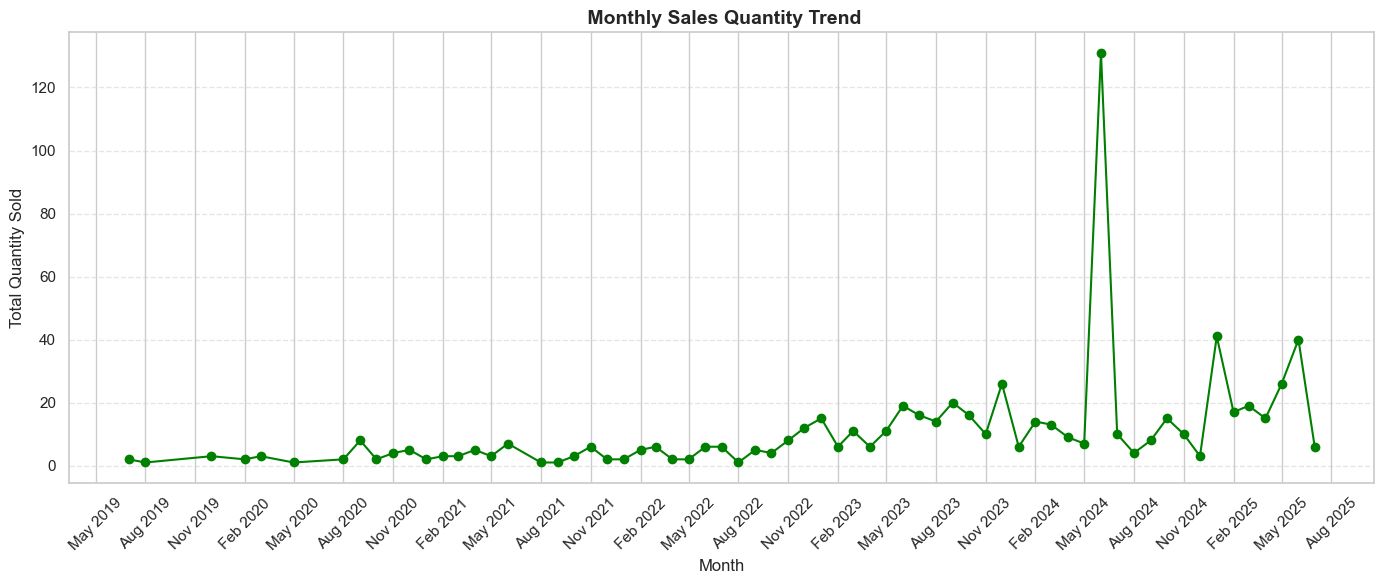

In [ ]:
import matplotlib.dates as mdates

# Convert to datetime for better control
monthly_sales['month_date'] = pd.to_datetime(monthly_sales['year_month'])

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['month_date'], monthly_sales['quantity'], marker='o', color='green')

# Format x-axis: show every 3rd month, nicely formatted
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Like Jan 2022

plt.title(" Monthly Sales Quantity Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


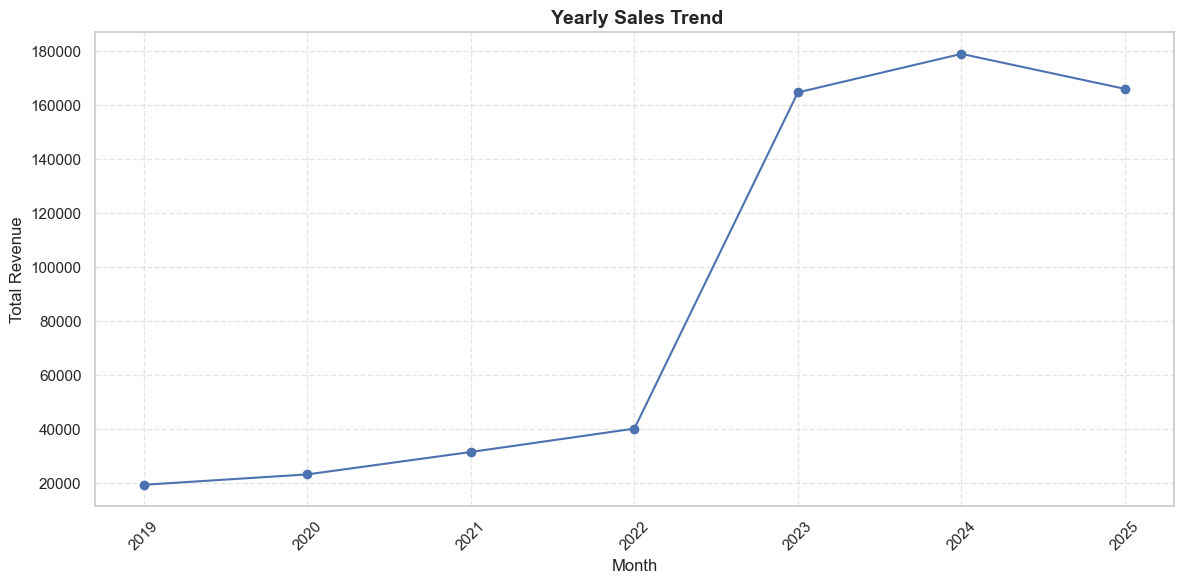

In [ ]:
monthly_sales = df.groupby('month')['revenue'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['revenue'], marker='o')
plt.xticks(rotation=45)
plt.title(' Yearly Sales Trend', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


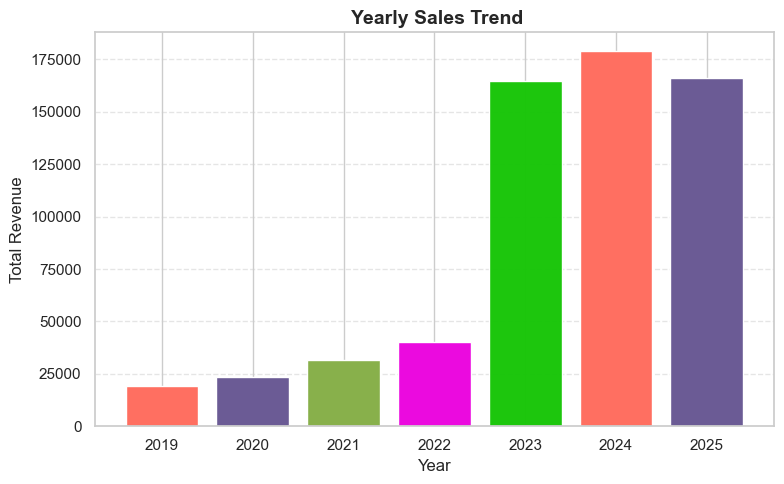

In [ ]:
import matplotlib.pyplot as plt

# 🎨 Custom colors (you can change or add more)
colors = ['#FF6F61', '#6B5B95', '#88B04B',  "#EB0ADF","#18c508fa"]
yearly_sales = df.groupby('year')['revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(yearly_sales['year'].astype(str), yearly_sales['revenue'], color=colors)
plt.title(' Yearly Sales Trend', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
#4. Which store has the highest average sale amount per transaction?
# Make sure revenue column exists
if 'revenue' not in df.columns:
    df['revenue'] = df['quantity'] * df['price']

# Group by store and compute average revenue per transaction
avg_sale_per_transaction = (
    df.groupby('store_name')
      .agg(total_revenue=('revenue', 'sum'),
           total_sales=('sale_id', 'nunique'))
)

avg_sale_per_transaction['avg_sale_per_transaction'] = (
    avg_sale_per_transaction['total_revenue'] / avg_sale_per_transaction['total_sales']
)

# Sort to get highest
avg_sale_per_transaction = avg_sale_per_transaction.sort_values(
    by='avg_sale_per_transaction', ascending=False
)

# Display top store
print("\n🏪 Store with Highest Average Sale Amount per Transaction:")
print(avg_sale_per_transaction[['avg_sale_per_transaction']].head(1))



🏪 Store with Highest Average Sale Amount per Transaction:
                         avg_sale_per_transaction
store_name                                       
Apple Store Los Angeles                   29995.0


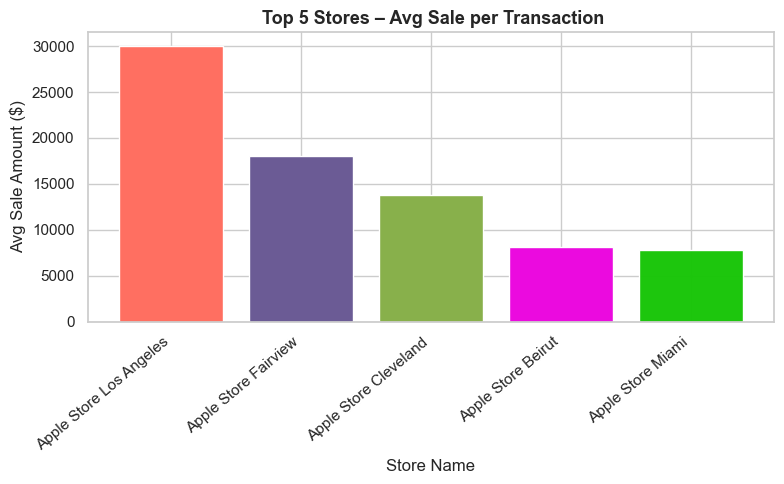

In [ ]:
import matplotlib.pyplot as plt

colors = ['#FF6F61', '#6B5B95', '#88B04B',  "#EB0ADF","#18c508fa"]
# 🔝 Limit to Top 5 Stores Only
top5_avg = avg_sale_per_transaction.head(5)

# 📊 Clean Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(top5_avg.index, top5_avg['avg_sale_per_transaction'], color=colors)

plt.title(' Top 5 Stores – Avg Sale per Transaction', fontsize=13, weight='bold')
plt.xlabel('Store Name')
plt.ylabel('Avg Sale Amount ($)')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
# Grid line removed

plt.show()



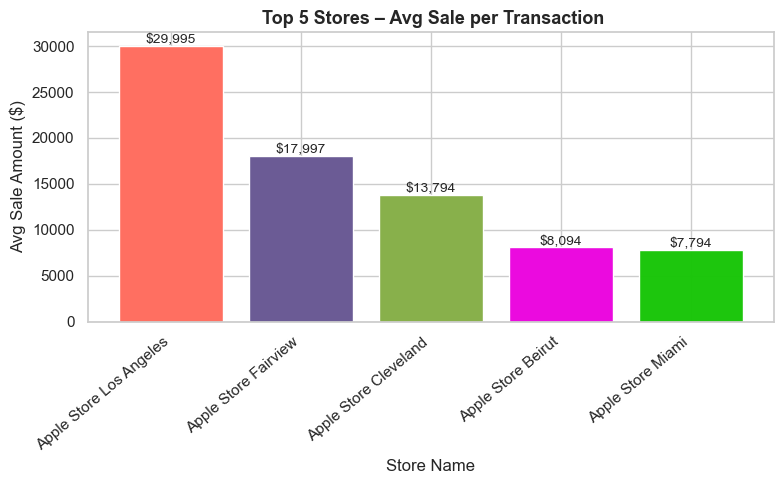

In [ ]:
import matplotlib.pyplot as plt

# 🎨 Custom colors (you can change or add more)
colors = ['#FF6F61', '#6B5B95', '#88B04B',  "#EB0ADF","#18c508fa"]

# 🔝 Plot top 5 with different colors
plt.figure(figsize=(8, 5))
plt.bar(top5_avg.index, top5_avg['avg_sale_per_transaction'], color=colors)

plt.title(' Top 5 Stores – Avg Sale per Transaction', fontsize=13, weight='bold')
plt.xlabel('Store Name')
plt.ylabel('Avg Sale Amount ($)')
plt.xticks(rotation=40, ha='right')
for i, val in enumerate(top5_avg['avg_sale_per_transaction']):
    plt.text(i, val + 300, f"${val:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
# Grid line removed

plt.show()


### 🛠️ Warranty Analysis

In [ ]:
# 1. What percentage of sales result in warranty claims?
# Count total sales and sales with claims
total_sales = df['sale_id'].nunique()
sales_with_claims = df[df['claim_id'].notna()]['sale_id'].nunique()

claim_percentage = (sales_with_claims / total_sales) * 100
print(f"🔧 Warranty Claim Rate: {claim_percentage:.2f}%")


🔧 Warranty Claim Rate: 38.75%


In [ ]:
# 2. Which product has the highest claim rate?
# Count claims and total sales per product
product_claims = df[df['claim_id'].notna()].groupby('product_name')['sale_id'].nunique()
product_sales = df.groupby('product_name')['sale_id'].nunique()

claim_rate = (product_claims / product_sales * 100).fillna(0)
top_claimed_product = claim_rate.sort_values(ascending=False).head(1)

print("\n🚨 Product with Highest Claim Rate:")
print(top_claimed_product)



🚨 Product with Highest Claim Rate:
product_name
AirPods 3rd Gen    100.0
Name: sale_id, dtype: float64



🛠️ Repair Status Distribution:
repair_status
Paid Repaired    23
In Progress      16
Rejected         16
Warranty Void    16
Repaired          9
Replaced          8
In Process        5
Name: count, dtype: int64


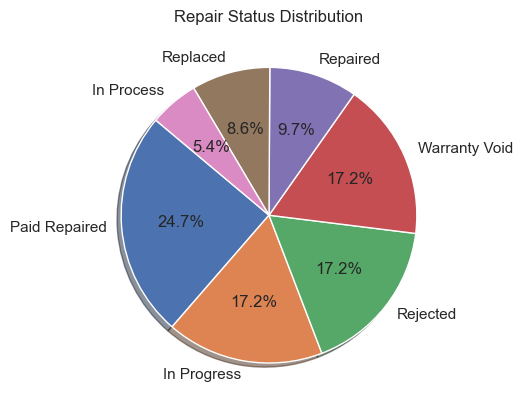

In [ ]:
#  3. What is the distribution of repair statuses?
repair_dist = df['repair_status'].value_counts(dropna=True)

print("\n🛠️ Repair Status Distribution:")
print(repair_dist)

#Optional 📊 Pie Chart:


import matplotlib.pyplot as plt

repair_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Repair Status Distribution")
plt.ylabel('')
plt.show()



🏬 Stores with Most Warranty Claims:
store_name
Apple Store  WinstonSalem West    1
Apple Store Akron South           1
Apple Store Akron West            1
Apple Store Andorra La Vella      1
Apple Store Antwerp               1
Name: claim_id, dtype: int64


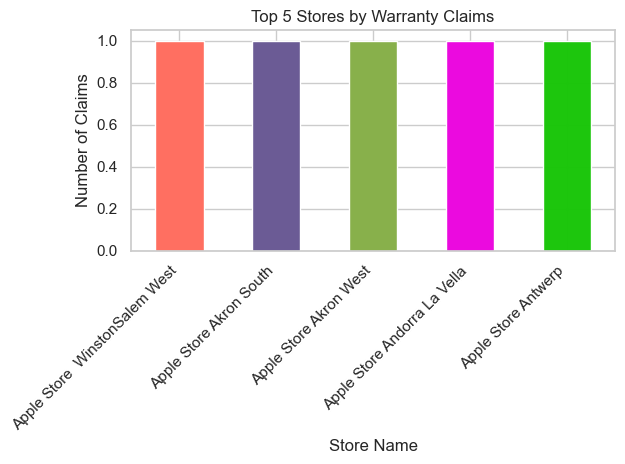

In [ ]:
# 4. Are certain stores seeing more warranty claims than others?
import matplotlib.pyplot as plt

# 🎨 Custom colors (you can change or add more)
colors = ['#FF6F61', '#6B5B95', '#88B04B',  "#EB0ADF","#18c508fa"]
claims_by_store = (
    df[df['claim_id'].notna()]
    .groupby('store_name')['claim_id']
    .count()
    .sort_values(ascending=False)
)

print("\n🏬 Stores with Most Warranty Claims:")
print(claims_by_store.head(5))

claims_by_store.head(5).plot(kind='bar', color=colors)
plt.title("Top 5 Stores by Warranty Claims")
plt.xlabel("Store Name")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 🔍 Deep Dives / Optional

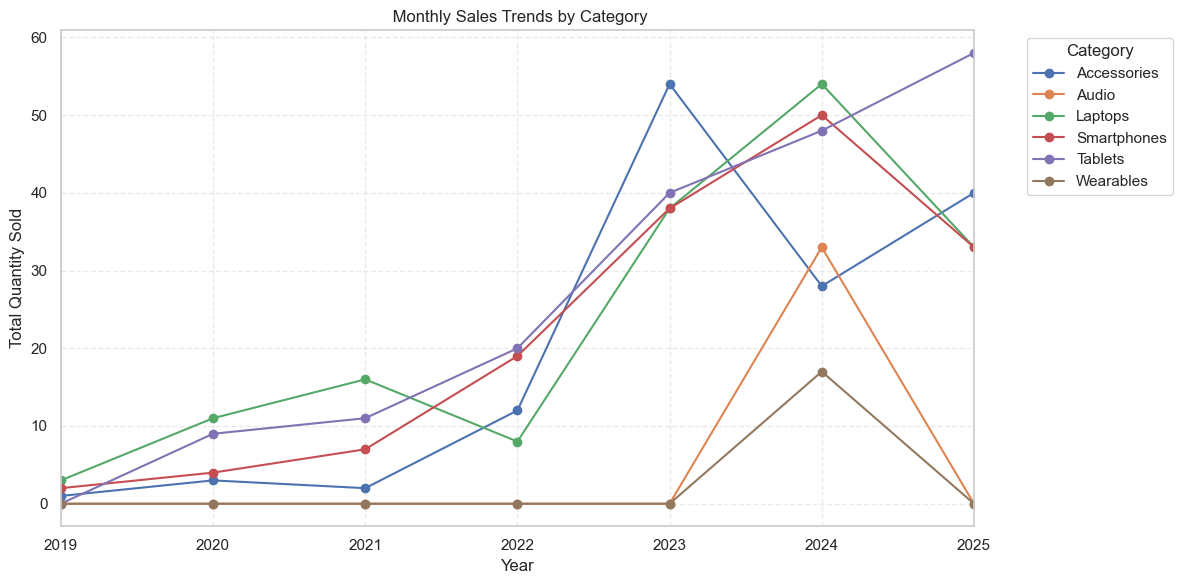

In [ ]:
# 1. Which categories show seasonal trends in sales?
# 🔄 Convert sale_date to datetime (if not done yet)
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

# 📅 Create 'Month' column
df['month'] = df['sale_date'].dt.to_period('Y')

# 📊 Monthly sales quantity by category
monthly_category_sales = (
    df.groupby(['month', 'category_name'])['quantity']
    .sum()
    .unstack()
    .fillna(0)
)

# ✅ Plot
monthly_category_sales.plot(figsize=(12, 6), marker='o')
plt.title(" Monthly Sales Trends by Category")
plt.xlabel("Year")
plt.ylabel("Total Quantity Sold")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



 Sales Performance Based on Launch Year:
launched_after_2022
Before or In 2022    287
After 2022           405
Name: quantity, dtype: int64


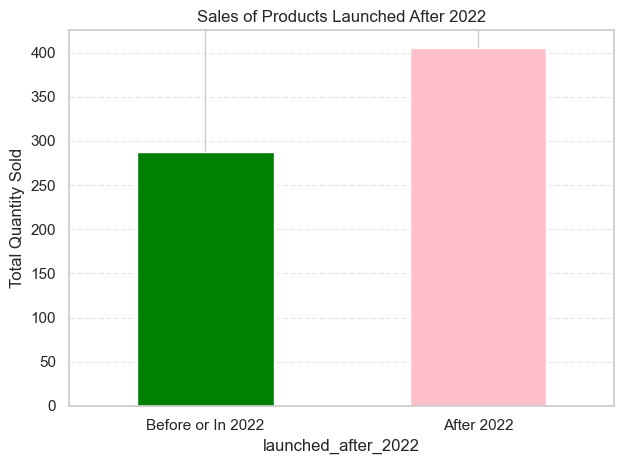

In [ ]:
#  2. Are products launched after 2022 performing better in sales?
# 📅 Convert launch_date to datetime
df['launch_date'] = pd.to_datetime(df['launch_date'], errors='coerce')

# 📌 Add flag column
df['launched_after_2022'] = df['launch_date'].dt.year > 2022

# 📊 Group and compare total sales quantity
launch_performance = (
    df.groupby('launched_after_2022')['quantity']
    .sum()
    .rename({True: 'After 2022', False: 'Before or In 2022'})
)

# ✅ Print and visualize
print("\n Sales Performance Based on Launch Year:")
print(launch_performance)

launch_performance.plot(kind='bar', color=['green', 'Pink'])
plt.title("Sales of Products Launched After 2022")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
num_stores_ny = df[df['city'] == 'Dubai']['store_name'].nunique()
print(f"\n🏙️ Number of Stores in City Dubai: {num_stores_ny}")




🏙️ Number of Stores in City Dubai: 2


In [ ]:
city = "Abu Dhabi"
num_stores = df[df['city'] == city]['store_name'].nunique()

print(f"\n🏙️ Number of Stores in City {city}: {num_stores}")




🏙️ Number of Stores in City Abu Dhabi: 2


In [ ]:
city = "Delhi"

# Filter stores in that city
stores_in_city = df[df['city'] == city]['store_name'].drop_duplicates()

# Count
num_stores = stores_in_city.nunique()

# Print
print(f"\n🏙️ Number of Stores in City {city}: {num_stores}")
print(f"🏬 Store(s) in {city}:")
for store in stores_in_city:
    print(f"• {store}")



🏙️ Number of Stores in City Delhi: 2
🏬 Store(s) in Delhi:
• Apple Store Saket Mall
• Apple Store Rajouri Garden


In [ ]:
city = "New York"

# Filter stores in that city
stores_in_city = df[df['city'] == city]['store_name'].drop_duplicates()

# Count
num_stores = stores_in_city.nunique()

# Print
print(f"\n🏙️ Number of Stores in City {city}: {num_stores}")
print(f"🏬 Store(s) in {city}:")
for store in stores_in_city:
    print(f"• {store}")



🏙️ Number of Stores in City New York: 2
🏬 Store(s) in New York:
• Apple Store New York
• Apple Store Ridge Hill


In [ ]:
city = "New York"

# Filter stores in that city
stores_in_city = df[df['city'] == city]['store_name'].drop_duplicates()

# Count
num_stores = stores_in_city.nunique()

# Print
print(f"\n🏙️ Number of Stores in City {city}: {num_stores}")
print(f"🏬 Store(s) in {city}:")
for store in stores_in_city:
    print(f"• {store}")



🏙️ Number of Stores in City New York: 2
🏬 Store(s) in New York:
• Apple Store New York
• Apple Store Ridge Hill


In [ ]:
country= "UAE"

# Filter stores in that city
stores_in_country = df[df['country'] == country]['store_name'].drop_duplicates()

# Count
num_stores = stores_in_country.nunique()

# Print
print(f"\n🏙️ Number of Stores in country {country}: {num_stores}")
print(f"🏬 Store(s) in {country}:")
for store in stores_in_country:
    print(f"• {store}")



🏙️ Number of Stores in country UAE: 4
🏬 Store(s) in UAE:
• Apple Store Yas Mall
• Apple Store Dubai Mall
• Apple Store Al Maryah Island
• Apple Store Mall of the Emirates


In [ ]:
country = "Germany"

# Filter stores in that country
stores_in_country = df[df['country'] == country][['store_name', 'city']].drop_duplicates()

# Count number of unique store names
num_stores = stores_in_country['store_name'].nunique()

# Print result
print(f"\n🏙️ Number of Stores in country {country}: {num_stores}")
print(f"🏬 Store(s) in {country}:")

# Show each store with its city
for index, row in stores_in_country.iterrows():
    print(f"• {row['store_name']} (📍{row['city']})")



🏙️ Number of Stores in country Germany: 6
🏬 Store(s) in Germany:
• Apple Store Berlin (📍Berlin)
• Apple Store Hamburg (📍Hamburg)
• Apple Store Kurf Arstendamm (📍Berlin)
• Apple Store Mall Of Berlin (📍Berlin)
• Apple Store Cologne (📍Bonn)
• Apple Store Frankfurt Zeil (📍Frankfurt)


In [ ]:
df.head(1)


,sale_id,store_id,product_id,quantity,claim_id,claim_date,repair_status,product_name,category_id,launch_date,price,category_name,store_name,city,country,revenue,sale_date,year_month,year,month,launched_after_2022
0,201,1,101,5,NaN,NaN,NaN,iPhone 13 Mini,1,2021-09-14,699,Smartphones,Apple Store Saket,New Delhi,India,3495,2023-12-01,2023-12,2023,2023,False


In [ ]:
# Fix both store name and city
df['store_name'] = df['store_name'].replace(' Apple Store Al Mall Emirates', 'Apple Store Mall of the Emirates')

#df['city'] = df['city'].replace('SãÂ£O Paulo', 'São Paulo')

df.to_csv("final_store_data_normalized.csv", index=False)


In [ ]:
df = pd.read_csv(r"D:\sql_python_mastery\Python_Journey\01_Apple_Store_Analytics_Project\final_store_data_normalized.csv", encoding='ISO-8859-1')


In [ ]:
country= "UAE"

# Filter stores in that city
stores_in_country = df[df['country'] == country]['store_name'].drop_duplicates()

# Count
num_stores = stores_in_country.nunique()

# Print
print(f"\n🏙️ Number of Stores in country {country}: {num_stores}")
print(f"🏬 Store(s) in {country}:")
for store in stores_in_country:
    print(f"• {store}")



🏙️ Number of Stores in country UAE: 4
🏬 Store(s) in UAE:
• Apple Store Yas Mall
• Apple Store Dubai Mall
• Apple Store Al Maryah Island
• Apple Store Mall of the Emirates


In [ ]:
import pandas as pd

# Step 1: Load final CSV (ensure correct path)
df = pd.read_csv(r"D:\sql_python_mastery\Python_Journey\01_Apple_Store_Analytics_Project\final_store_data_normalized.csv", encoding='ISO-8859-1')

# Step 2: Show exact duplicates based on store_name + city
exact_dups = df[df.duplicated(subset=['store_name', 'city'], keep=False)]

print(f"\n🔁 Exact Duplicates (store_name + city): {len(exact_dups)}")
print(exact_dups[['store_name', 'city']].sort_values('store_name'))



🔁 Exact Duplicates (store_name + city): 0
Empty DataFrame
Columns: [store_name, city]
Index: []


In [ ]:
# Step 3: Duplicate store_name used in more than one city
multi_city_dups = df[df.duplicated(subset=['store_name'], keep=False)]

print(f"\n🏙️ Store Names Appearing in Multiple Cities: {len(multi_city_dups)}")
print(multi_city_dups[['store_name', 'city']].sort_values('store_name'))



🏙️ Store Names Appearing in Multiple Cities: 0
Empty DataFrame
Columns: [store_name, city]
Index: []


In [ ]:
# Step 4: See unique characters used in store names
# unique_names = df['store_name'].unique()

# for name in unique_names:
#     print(f"{repr(name)} → length: {len(name)}")


In [ ]:
def contains_unicode(text):
    return any(ord(char) > 127 for char in str(text))

# Apply to store_name column
unicode_store_names = df[df['store_name'].apply(contains_unicode)]

print("🔍 Store Names with Unicode characters:")
print(unicode_store_names[['store_name', 'city']])


🔍 Store Names with Unicode characters:
Empty DataFrame
Columns: [store_name, city]
Index: []


In [ ]:
# Fix both store name and city
df['store_name'] = df['store_name'].replace('Apple Store Winston_Salem', 'Apple Store WinstonSalem')
#df['city'] = df['city'].replace('Winstonsalem', 'WinstonSalem')


In [ ]:
df.to_csv("final_store_data_normalized.csv", index=False)


In [ ]:
df.head(13)


,sale_id,store_id,product_id,quantity,claim_id,claim_date,repair_status,product_name,category_id,launch_date,price,category_name,store_name,city,country,revenue,sale_date,year_month,year,month,launched_after_2022
0,201,1,101,5,NaN,NaN,NaN,iPhone 13 Mini,1,2021-09-14,699,Smartphones,Apple Store Saket,New Delhi,India,3495,2023-12-01,2023-12,2023,2023,False
1,202,2,102,2,NaN,NaN,NaN,"MacBook Pro M1 13""",2,2021-10-18,1299,Laptops,Apple Store London,London,UK,2598,2023-12-20,2023-12,2023,2023,False
2,203,3,103,1,NaN,NaN,NaN,iPad Mini 6,3,2021-09-24,499,Tablets,Apple Store Yas Mall,Abu Dhabi,UAE,499,2024-05-05,2024-05,2024,2024,False
3,204,4,104,3,NaN,NaN,NaN,Apple Watch Series 7,4,2021-10-15,399,Accessories,Apple Store Tokyo,Tokyo,Japan,1197,2023-12-15,2023-12,2023,2023,False
4,206,5,105,4,303.0,NaN,Paid Repaired,iPhone 14 Pro,1,2022-09-16,999,Smartphones,Apple Store Sydney,Sydney,Australia,3996,2022-10-10,2022-10,2022,2022,False
5,210,21,120,2,306.0,05/08/2023,Paid Repaired,"MacBook Pro M2 14""",2,2023-01-17,1999,Laptops,Apple Store Vienna,Vienna,Austria,3998,2024-03-01,2024-03,2024,2024,True
6,211,14,189,1,307.0,NaN,In Progress,iPad Air 2,3,2014-10-22,399,Tablets,Apple Store Sao Paulo,Sao Paulo,Brazil,399,2023-12-15,2023-12,2023,2023,False
7,212,65,213,4,NaN,NaN,NaN,"iPad 10.9""",3,2023-10-17,449,Tablets,Apple Store Jakarta,Jakarta,Indonesia,1796,2022-06-10,2022-06,2022,2022,True
8,213,88,277,3,308.0,NaN,Paid Repaired,iPad Explore,3,2025-11-08,749,Tablets,Apple Store Zagreb,Zagreb,Croatia,2247,2025-01-05,2025-01,2025,2025,True
9,214,100,141,2,NaN,NaN,NaN,iPad Mini 5,3,2019-03-18,399,Tablets,Apple Store Canberra,Canberra,Australia,798,2021-11-20,2021-11,2021,2021,False


In [ ]:
total_sales = df['price'] * df['quantity']
print(total_sales)


0      3495
1      2598
2       499
3      1197
4      3996
       ... 
235    1998
236    2796
237     498
238    1287
239     895
Length: 240, dtype: int64


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"D:\sql_python_mastery\Python_Journey\01_Apple_Store_Analytics_Project\final_store_data_normalized.csv")

# Fix corrupted name manually
df['product_name'] = df['product_name'].replace('Apple Watch HermÃÂ¨s', 'Apple Watch Hermès')

# Optional: normalize entire column to clean similar issues
import unicodedata
df['product_name'] = df['product_name'].apply(lambda x: unicodedata.normalize("NFKC", str(x)).strip())

# Save cleaned version
df.to_csv(r"D:\sql_python_mastery\Python_Journey\01_Apple_Store_Analytics_Project\final_store_data_normalized.csv", index=False)

print("✅ Product name fixed and file saved.")


✅ Product name fixed and file saved.


In [ ]:
# Show all unique product names
# #print(df['product_name'].unique())
# for idx, product in enumerate(df['product_name'].unique(), start=1):
#     print(f"{idx}. {product}")


In [ ]:
# for idx, item in enumerate(df['store_name'].unique(), start=1):
#     print(f"{idx}. {item}")


In [ ]:
import unicodedata

def normalize_unicode(text):
    return unicodedata.normalize("NFKC", str(text)).strip()

df['store_name'] = df['store_name'].apply(normalize_unicode)
df['city'] = df['city'].apply(normalize_unicode)


In [ ]:
df.to_csv(r"D:\sql_python_mastery\Python_Journey\01_Apple_Store_Analytics_Project\final_store_data_normalized.csv", index=False)
print("✅ Saved cleaned data.")


✅ Saved cleaned data.


In [ ]:
df.head()


,sale_id,store_id,product_id,quantity,claim_id,claim_date,repair_status,product_name,category_id,launch_date,price,category_name,store_name,city,country,revenue,sale_date,year_month,year,month,launched_after_2022
0,201,1,101,5,NaN,NaN,NaN,iPhone 13 Mini,1,2021-09-14,699,Smartphones,Apple Store Saket,New Delhi,India,3495,2023-12-01,2023-12,2023,2023,False
1,202,2,102,2,NaN,NaN,NaN,"MacBook Pro M1 13""",2,2021-10-18,1299,Laptops,Apple Store London,London,UK,2598,2023-12-20,2023-12,2023,2023,False
2,203,3,103,1,NaN,NaN,NaN,iPad Mini 6,3,2021-09-24,499,Tablets,Apple Store Yas Mall,Abu Dhabi,UAE,499,2024-05-05,2024-05,2024,2024,False
3,204,4,104,3,NaN,NaN,NaN,Apple Watch Series 7,4,2021-10-15,399,Accessories,Apple Store Tokyo,Tokyo,Japan,1197,2023-12-15,2023-12,2023,2023,False
4,206,5,105,4,303.0,NaN,Paid Repaired,iPhone 14 Pro,1,2022-09-16,999,Smartphones,Apple Store Sydney,Sydney,Australia,3996,2022-10-10,2022-10,2022,2022,False


####  Setup for Date Format and Missing Date in Sales_date

#### Replace store name
df['store_name'] = df['store_name'].replace({
    'Apple Store Dubai': 'Apple Store Yas Mall'
})
##### Replace city for that store
df.loc[df['store_name'] == 'Apple Store Ridge Hill', 'city'] = 'New York'

df.loc[df['store_name'] == 'Apple Store Ridge Hill', 'city'] = 'New York'
df.loc[df['store_name'] == 'Apple Store Ridge Hill', ['store_name', 'city']] = ['Apple Store Ridge Hill', 'New York']
